In [1]:
# purpose: visuals for publication of hatchery releases over time.

In [ ]:
# must open Jupyter as 'administrator' to install plotly, vega

# import sys
#!{sys.executable} -m pip install plotly_express 
#!{sys.executable} -m pip install vega 
#!conda install --yes --prefix {sys.prefix} gdal #did not help (says already installed)
#!conda install --yes --prefix {sys.prefix} geopandas #worked
#!conda install --yes --prefix {sys.prefix} geoplot
#!conda install -c conda-forge geoplot #didn't work

In [13]:
import plotly_express as px
import pandas as pd
import altair as alt
import vega as v

#alt.renderers.enable('jupyterlab')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
localpath_epad = "C:/Users/Greig/Sync/6. SSMSP Model/Model Greig/Data/1. Salmon/All Species Hatchery Releases/EPADHatcherReleasesGST"
releases = pd.read_csv(localpath_epad + "/MODIFIED/actual_releases_COORDS.csv",parse_dates=['RELEASE_YEAR'])
releases.columns

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14,24,29,37,38,44,46,62,66,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'AVE_WEIGHT', 'BIOMASS_MT', 'BROOD_YEAR',
       'COORD_SourceRound', 'END_DATE', 'END_DAY_REL', 'END_MO_REL',
       'END_YR_REL', 'FACILITY_NAME', 'FID', 'FINAL_LAT', 'FINAL_LON',
       'FeatureType', 'GAZETTED_NAME', 'LATITUDE_PSF', 'LAT_GLO', 'LAT_GLO_x',
       'LAT_GLO_y', 'LONGITUDE_PSF', 'LON_GLO', 'LON_GLO_x', 'LON_GLO_y',
       'MRP_TAGCODE', 'NEW_WATERSHED_CODE', 'NONZERO_MEAN_WEIGHT', 'NoTagClip',
       'NoTagNum', 'NoTagPartMarkNum', 'Note', 'PROGRAM_CODE', 'PROJ_NAME',
       'PURPOSE_CODE', 'REARING_TYPE_CODE', 'RELEASE_COMMENT',
       'RELEASE_SITE_NAME', 'RELEASE_SITE_NAME_G', 'RELEASE_SITE_NAME_x',
       'RELEASE_SITE_NAME_y', 'RELEASE_STAGE_NAME', 'RELEASE_YEAR',
       'REL_CU_INDEX', 'REL_CU_NAME', 'RUN_NAME', 'Release_Site', 'RowNum',
       'SOURCE', 'SPECIES_NAME', 'START_DATE', 'START_DAY_REL', 'START_MO_REL',
       'START_YR_REL', 'STOCK_CU_INDEX', 'STOCK_CU_NAME', 'STOCK_NAME',
       'STOCK_PROD_AREA_CODE', 'STOCK_TYPE_CODE', 'Shed

In [5]:
releases.loc[releases['STOCK_PROD_AREA_CODE'] == 'TOMM', 'Area'] = 'Thompson & Shuswap R.'
releases.loc[releases['STOCK_PROD_AREA_CODE'] == 'TOMF', 'Area'] = 'Thompson & Shuswap R.'
releases.loc[releases['STOCK_PROD_AREA_CODE'] == 'GSMN', 'Area'] = 'Georgia Strait Mainland North'
releases.loc[releases['STOCK_PROD_AREA_CODE'] == 'GSMS', 'Area'] = 'Georgia Strait Mainland South'
releases.loc[releases['STOCK_PROD_AREA_CODE'] == 'UPFR', 'Area'] = 'Upper Fraser R.'
releases.loc[releases['STOCK_PROD_AREA_CODE'] == 'LWFR', 'Area'] = 'Lower Fraser R.'
releases.loc[releases['STOCK_PROD_AREA_CODE'] == 'GSVI', 'Area'] = 'Georgia Strait Vancouver Is.'

### Altair (with Vega) Libraries 
https://altair-viz.github.io/gallery/interactive_legend.html
https://altair-viz.github.io/gallery/multiline_tooltip.html

In [3]:
# notebook render
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [6]:
print("Note that RELEASE_REGION has 1600+ blanks in the records, so better to use STOCK_PROD_AREA_CODE to aggregate")

coho_releases = releases.loc[releases['SPECIES_NAME']=="Coho"]
chin_releases = releases.loc[releases['SPECIES_NAME']=="Chinook"]
print("In altair there is a 5000 record limit on data size. The length of the Coho table:")
print(len(coho_releases))
print("In altair there is a 5000 record limit on data size. The length of the Chinook table:")
print(len(chin_releases))

Note that RELEASE_REGION has 1600+ blanks in the records, so better to use STOCK_PROD_AREA_CODE to aggregate
In altair there is a 5000 record limit on data size. The length of the Coho table:
9631
In altair there is a 5000 record limit on data size. The length of the Chinook table:
4734


In [7]:
# for use elsewhere (ArcGIS Online Dashboard?)
releases_agg = releases.groupby(['SPECIES_NAME','STOCK_PROD_AREA_CODE','RELEASE_YEAR'])['TotalRelease','BIOMASS_MT'].sum().reset_index()
releases_agg.to_csv(r'Actual_Releases_Aggregated_fromNotebook2.csv', index = True)

coho_releases_agg = coho_releases.groupby(['Area','RELEASE_YEAR'])['TotalRelease','BIOMASS_MT'].sum().reset_index()
chin_releases_agg = chin_releases.groupby(['Area','RELEASE_YEAR'])['TotalRelease','BIOMASS_MT'].sum().reset_index()

In [ ]:
# note - altair encoding data types
#quantitative 	Q 	a continuous real-valued quantity
#ordinal 	O 	a discrete ordered quantity
#nominal 	N 	a discrete unordered category
#temporal 	T 	a time or date value
#geojson 	G 	a geographic shape

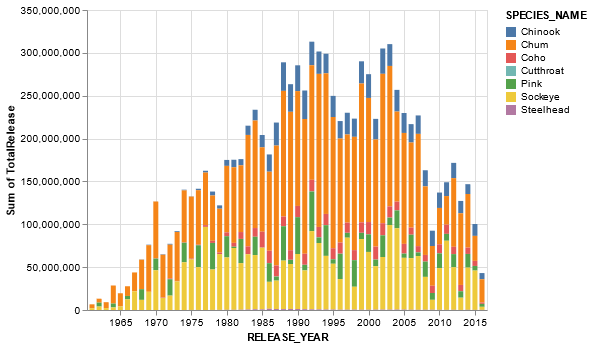

In [17]:
source1 = releases_agg

alt.Chart(source1).mark_bar().encode(
    x='RELEASE_YEAR',
    y='sum(TotalRelease)',
    color='SPECIES_NAME'
)

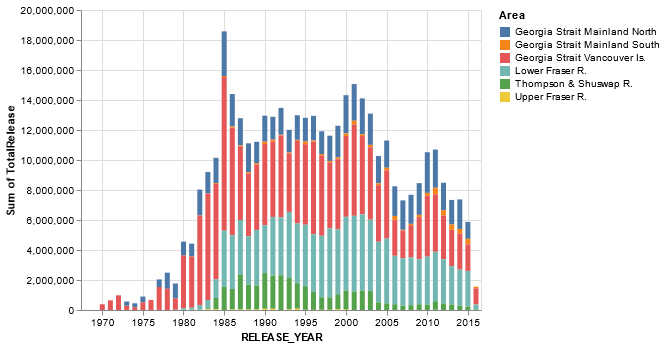

In [15]:
source = coho_releases_agg

alt.Chart(source).mark_bar().encode(
    x='RELEASE_YEAR',
    y='sum(TotalRelease)',
    color='Area'
)

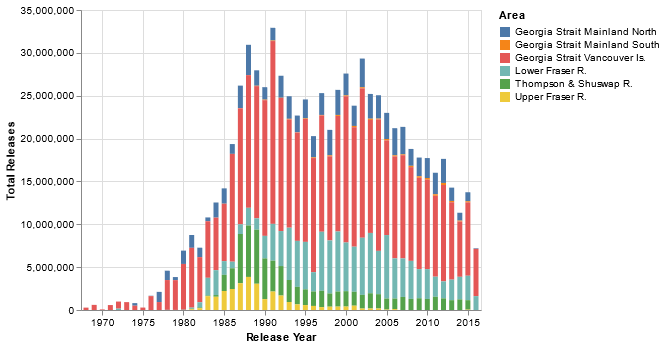

In [72]:
source = chin_releases_agg

alt.Chart(source).mark_bar().encode(
    x=alt.X('RELEASE_YEAR', title='Release Year'),
    y=alt.Y('sum(TotalRelease)', title='Total Releases'),
    color='Area'
)



In [ ]:
color3=alt.Color('StockName:O',
                   scale=alt.Scale(
            range=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']))

# for info about input dropdown
#https://altair-viz.github.io/user_guide/interactions.html
input_dropdown = alt.binding_select(options=['PS','SOG','FRTR','CR','JNST','WCVI','WA',
                    'null'])

selection = alt.selection_single(fields=['Location'], bind=input_dropdown, name='Location: ')

# other options for dropdown / filter
#input_dropdown2 = alt.binding_select(options=['stream','ocean','all','null'])

#selection2 = alt.selection_single(fields=['JuvenileTy'], bind=input_dropdown2, name='Juvenile Strat ')

base = alt.Chart(surv).mark_line().encode(
    x=alt.X('year(year)', title='year'),
    y=alt.Y('survival:Q',
            title='Survival (% to Age 2)',
            scale=alt.Scale(domain=(0, 0.5))),
    color=color3,
    detail='Stock:N').add_selection(selection).transform_filter(selection)

base

In [18]:
releases[releases['region']]

ValueError: cannot index with vector containing NA / NaN values

In [32]:
releases[releases['STOCK_PROD_AREA_CODE']=="TOMM"]

,Unnamed: 0,AVE_WEIGHT,BIOMASS_MT,BROOD_YEAR,COORD_SourceRound,END_DATE,END_DAY_REL,END_MO_REL,END_YR_REL,FACILITY_NAME,...,location_key2,name,notes,objectid,region,rmis_latitude,rmis_longitude,rpagency,source,submission
532,532,1.86,0.014043,1985,NaN,19860831,31.0,8.0,1986,Deadman River H,...,NaN,R-Deadman R,NaN,13825.0,FRTH,50.7444,-120.9195,CDFO,O1,2019-02-04
533,533,1.70,0.015047,1986,NaN,19870629,29.0,6.0,1987,Deadman River H,...,NaN,R-Deadman R,NaN,13825.0,FRTH,50.7444,-120.9195,CDFO,O1,2019-02-04
534,534,1.70,0.016485,1986,NaN,19870708,8.0,7.0,1987,Deadman River H,...,NaN,R-Deadman R,NaN,13825.0,FRTH,50.7444,-120.9195,CDFO,O1,2019-02-04
535,535,2.10,0.016153,1986,NaN,19870817,17.0,8.0,1987,Deadman River H,...,NaN,R-Deadman R,NaN,13825.0,FRTH,50.7444,-120.9195,CDFO,O1,2019-02-04
536,536,3.80,0.016678,1986,NaN,19871112,12.0,11.0,1987,Deadman River H,...,NaN,R-Deadman R,NaN,13825.0,FRTH,50.7444,-120.9195,CDFO,O1,2019-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21333,21333,10.00,0.035000,2000,NaN,20020630,30.0,6.0,2002,Thurman Channel,...,Thurman Ch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21334,21334,0.50,0.037500,2000,NaN,20010630,30.0,6.0,2001,Thurman Channel,...,Thurman Ch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21335,21335,0.50,0.037500,2001,NaN,20020630,30.0,6.0,2002,Thurman Channel,...,Thurman Ch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21336,21336,10.00,0.035000,2001,NaN,20030630,30.0,6.0,2003,Thurman Channel,...,Thurman Ch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
